<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/ALL_COMPUTATIONAL_SUBSTRATES_XGBOOST_WITH_TREESHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2   

In [ ]:
#helper utilities for model training and interpretation 
import shap
import sys 
sys.path.append('..')

from helpers import * 

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import chart_studio.plotly as plotly
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap





## Substrates combined, xgboost with TreeShap <a name='outline'>
<ol>
    <li><a href=#1>All features</a></li>
    <li><a href=#2>Feature subsets</a></li>
 </ol>


## All features<a name='1'>
<a href=#outline>Home</a>

In [3]:
## Read in the data 
import pandas as pd 

In [4]:
data_neil_comp=pd.read_csv("../../xin_feature_matrices/neil1_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
data_neil_comp=data_neil_comp[~data_neil_comp["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_neil_comp=format_for_xgboost(data_neil_comp)
random.seed(1234)
train_split2,eval_split2,test_split2=split_train_test_eval_by_mut_pos(data_neil_comp[~data_neil_comp['mut_pos'].isna()])
null_mut_pos=data_neil_comp[data_neil_comp['mut_pos'].isna()]
train_split2=pd.concat((train_split2,null_mut_pos),axis=0)

train_split2['dataset']="NEIL1_COMP"
eval_split2['dataset']="NEIL1_COMP"
test_split2['dataset']="NEIL1_COMP"

(434, 202)
{20.0: 3, 21.0: 3, 22.0: 4, 23.0: 4, 24.0: 3, 25.0: 4, 26.0: 3, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 3, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 41.0: 21, 42.0: 21, 43.0: 18, 44.0: 18, 45.0: 20, 46.0: 20, 48.0: 20, 49.0: 21, 50.0: 21, 51.0: 20, 52.0: 20, 53.0: 21, 54.0: 19, 55.0: 21, 56.0: 21, 57.0: 15, 58.0: 33}


In [5]:
data_ttyh2_comp=pd.read_csv("../../xin_feature_matrices/ttyh2_computational.features.csv",header=0,sep=',',index_col=0)
#remove any null editing level values 
data_ttyh2_comp=data_ttyh2_comp[~data_ttyh2_comp["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_ttyh2_comp=format_for_xgboost(data_ttyh2_comp)
random.seed(1234)
train_split4,eval_split4,test_split4=split_train_test_eval_by_mut_pos(data_ttyh2_comp[~data_ttyh2_comp['mut_pos'].isna()])
null_mut_pos=data_ttyh2_comp[data_ttyh2_comp['mut_pos'].isna()]
train_split4=pd.concat((train_split4,null_mut_pos),axis=0)

train_split4['dataset']="TTYH2_COMP"
eval_split4['dataset']="TTYH2_COMP"
test_split4['dataset']="TTYH2_COMP"



(601, 205)
{21.0: 18, 22.0: 18, 23.0: 18, 24.0: 20, 25.0: 17, 26.0: 20, 27.0: 20, 28.0: 20, 29.0: 18, 30.0: 18, 31.0: 17, 32.0: 17, 33.0: 17, 34.0: 18, 35.0: 18, 36.0: 18, 79.0: 17, 80.0: 17, 81.0: 18, 82.0: 18, 83.0: 19, 84.0: 19, 85.0: 20, 86.0: 29, 88.0: 27, 89.0: 18, 90.0: 17, 91.0: 17, 92.0: 17, 93.0: 14, 94.0: 36}


In [6]:
data_ajuba=pd.read_csv("../../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)

#remove any null editing level values 
data_ajuba=data_ajuba[~data_ajuba["editing_value"].isnull().values]
## prepare data for training with xgboost 
data_ajuba=format_for_xgboost(data_ajuba)
random.seed(1234)
train_split5,eval_split5,test_split5=split_train_test_eval_by_mut_pos(data_ajuba[~data_ajuba['mut_pos'].isna()])
null_mut_pos=data_ajuba[data_ajuba['mut_pos'].isna()]
train_split5=pd.concat((train_split5,null_mut_pos),axis=0)

train_split5['dataset']="AJUBA"
eval_split5['dataset']="AJUBA"
test_split5['dataset']="AJUBA"


(482, 195)
{64.0: 22, 65.0: 21, 66.0: 22, 67.0: 22, 68.0: 22, 69.0: 23, 70.0: 23, 71.0: 24, 72.0: 23, 73.0: 33, 75.0: 33, 76.0: 24, 77.0: 24, 78.0: 23, 79.0: 23, 80.0: 22, 81.0: 22, 82.0: 22, 83.0: 44}


In [7]:
train_split=pd.concat([train_split2,train_split4,train_split5])
eval_split=pd.concat([eval_split2,eval_split4,eval_split5])
test_split=pd.concat([test_split2,test_split4,test_split5])

train_split.reset_index(inplace=True, drop=True) 
eval_split.reset_index(inplace=True,drop=True)
test_split.reset_index(inplace=True,drop=True)

In [8]:
train_dataset=train_split['dataset']
eval_dataset=eval_split['dataset']
test_dataset=test_split['dataset']

In [9]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [10]:
#Remove any null features 
train_null=get_high_missingness_features(train_split)
eval_null=get_high_missingness_features(eval_split)
test_null=get_high_missingness_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [11]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
to_drop.append('dataset')
print("\n".join(to_drop))

u1_3prm_cp_internal
d2_3prm_cp_internal:U:G
u2_length_hairpin
u3_length_internal_es
u3_3prm_cp_internal:G:C
u3_length_internal_ecs
u2_5prm_cp_bulge:U:A
u3_3prm_cp_internal:C:G
u1_3prm_cp_internal:U:A
mut_type:wt
mut_type:indel
u1_3prm_cp_bulge
u3_3prm_cp_internal
u3_5prm_cp_bulge:C:G
site_3prm_cp_internal:U:A
u1_length_hairpin
u2_length_bulge
u2_5prm_cp_bulge:U:G
u2_5prm_cp_hairpin:G:C
d1_5prm_cp_hairpin
d2_struct:S
site_5prm_cp_bulge:G:U
site_5prm_cp_hairpin:G:C
mut_struct:H
u2_5prm_cp_internal:G:U
u1_5prm_cp_internal
site_5prm_cp_internal:A:U
u3_length_hairpin
site_length_hairpin
mut_next_struct:E
u1_5prm_cp_bulge
d3_3prm_cp_internal
d1_struct:I
d3_5prm_cp_hairpin
u1_3prm_cp_bulge:A:U
u1_struct:B
u1_3prm_cp_internal:C:G
d3_5prm_cp_bulge
mut_prev_struct:M
site_5prm_cp_hairpin
d2_5prm_cp_bulge:A:U
mut_ref_nt:U
u2_5prm_cp_hairpin:U:A
d1_exist
d3_length_internal_es
u2_5prm_cp_hairpin:C:G
d1_3prm_cp_internal:A:U
d1_distance
d2_3prm_cp_bulge:A:U
u3_5prm_cp_internal
site_5prm_cp_bulge:U:G
u

In [12]:
#remove teh features that don't change across isoforms , or are null for all isoforms
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [14]:
## load new substrate beal for testing 
data_beal=pd.read_csv("../../xin_feature_matrices/2020-06-22_Beal_hADAR1d_RNA_remove_WT_ref.features.csv",header=0,sep=',',index_col=0)
ids=data_beal.index.tolist()
## prepare data for training with xgboost 
data_beal=format_for_xgboost(data_beal)


(8, 126)


In [16]:
data_beal_to_predict=data_beal[train_split.columns.intersection(data_beal.columns)]
missing=set(train_split.columns)-set(data_beal.columns)

In [17]:
train_split=train_split.drop(missing,axis=1)
eval_split=eval_split.drop(missing,axis=1)
test_split=test_split.drop(missing,axis=1)

In [18]:

train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)
eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)
test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [19]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(1015, 64)
(1015,)
(201, 64)
(201,)
(244, 64)
(244,)


In [20]:
data_beal_to_predict.shape

(8, 65)

In [21]:
## format matrixes for xgboost 
import xgboost
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [22]:
## set model training parameters 
from __future__ import unicode_literals
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 

#Note: the last metric in your 'eval_metric' list will get optimized 
param['eval_metric'] = ['rmse']#['aucpr','auc','mae','map','rmse']

In [23]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [24]:
num_round = 1000
random.seed(1234)
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-rmse:0.28696	train-rmse:0.28135
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-rmse:0.21552	train-rmse:0.20595
[2]	eval-rmse:0.16718	train-rmse:0.15474
[3]	eval-rmse:0.13710	train-rmse:0.11869
[4]	eval-rmse:0.11921	train-rmse:0.09534
[5]	eval-rmse:0.10688	train-rmse:0.07984
[6]	eval-rmse:0.09946	train-rmse:0.06885
[7]	eval-rmse:0.09514	train-rmse:0.06259
[8]	eval-rmse:0.09261	train-rmse:0.05796
[9]	eval-rmse:0.09045	train-rmse:0.05451
[10]	eval-rmse:0.08811	train-rmse:0.05216
[11]	eval-rmse:0.08682	train-rmse:0.04936
[12]	eval-rmse:0.08595	train-rmse:0.04688
[13]	eval-rmse:0.08585	train-rmse:0.04583
[14]	eval-rmse:0.08511	train-rmse:0.04492
[15]	eval-rmse:0.08460	train-rmse:0.04347
[16]	eval-rmse:0.08432	train-rmse:0.04107
[17]	eval-rmse:0.08418	train-rmse:0.04054
[18]	eval-rmse:0.08368	train-rmse:0.03934
[19]	eval-rmse:0.08370	train-rmse:0.03866
[20]	eval-rmse:0.08345	tr

[190]	eval-rmse:0.07600	train-rmse:0.00171
[191]	eval-rmse:0.07600	train-rmse:0.00171
[192]	eval-rmse:0.07600	train-rmse:0.00171
Stopping. Best iteration:
[182]	eval-rmse:0.07600	train-rmse:0.00171



In [25]:
data_beal_to_predict=data_beal_to_predict[train_X.columns]

In [26]:
data_beal_to_predict.iloc[0]

minimum_free_energy       -11.800000
ensemble_free_energy      -12.270000
mfe_frequency               0.465943
ensemble_diversity          1.270000
all_stem_length            12.000000
                             ...    
d3_length                        NaN
d3_length_stem                   NaN
site_next_nt:G              1.000000
u2_3prm_cp_internal:C:G     0.000000
u2_3prm_cp_internal:U:A     0.000000
Name: 0, Length: 64, dtype: float64

In [27]:
dbeal=xgboost.DMatrix(data_beal_to_predict,data_beal['editing_value'])

In [28]:
dbeal_pred=bst.predict(dbeal)

In [29]:
dbeal_labels=data_beal['editing_value']

In [30]:
import plotnine
from plotnine import *
test_df=pd.DataFrame({'Observed':dbeal_labels.values,
                     'Predicted':dbeal_pred,
                     'Dataset':ids})

In [31]:
test_df

,Observed,Predicted,Dataset
0,0.38,0.162615,HER1
1,0.40,0.089912,PDR15
2,0.28,0.333651,SPT6
3,0.22,0.182589,SCT1
4,0.26,0.265308,RSM28
5,0.25,0.229292,GSY1
6,0.22,0.352965,BDF2
7,0.00,0.129918,GluR_B


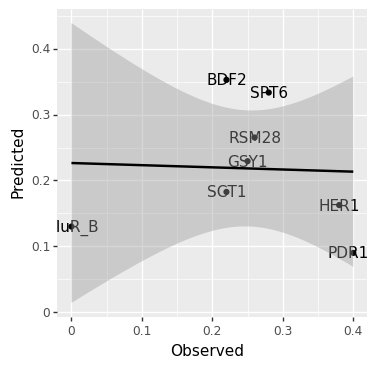

<ggplot: (8770075124357)>


In [32]:
plotnine.options.figure_size = (4, 4)

p=(ggplot(test_df, aes('Observed', 'Predicted', label='factor(Dataset)'))
 + geom_point()
 + geom_text()
 + stat_smooth(method='lm')
 + theme(legend_position="bottom"))

print(p)
p.save(filename = 'xgboost_Beal.pdf', height=5, width=5, units = 'in', dpi=1000)


In [33]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)

In [34]:
dbeal_shap_values=explainer.shap_values(dbeal)

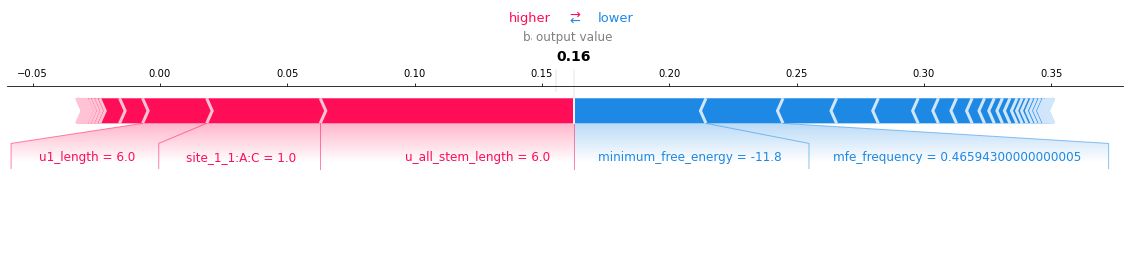

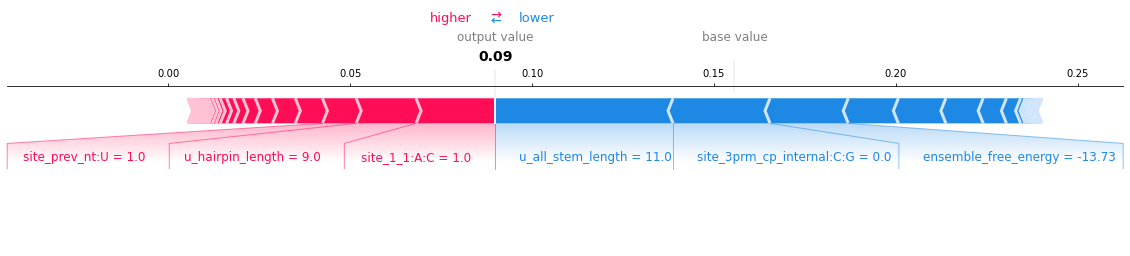

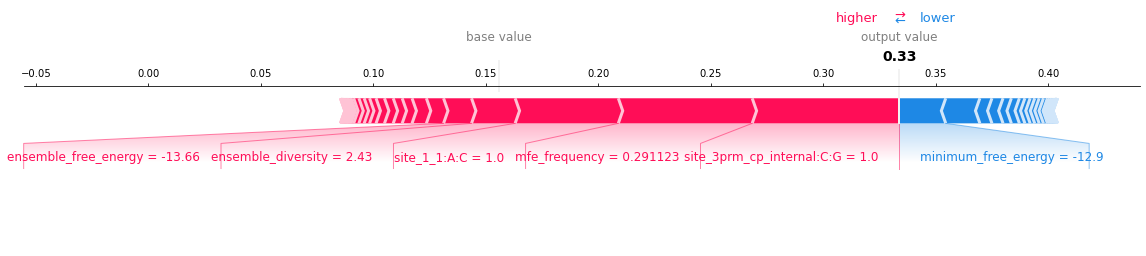

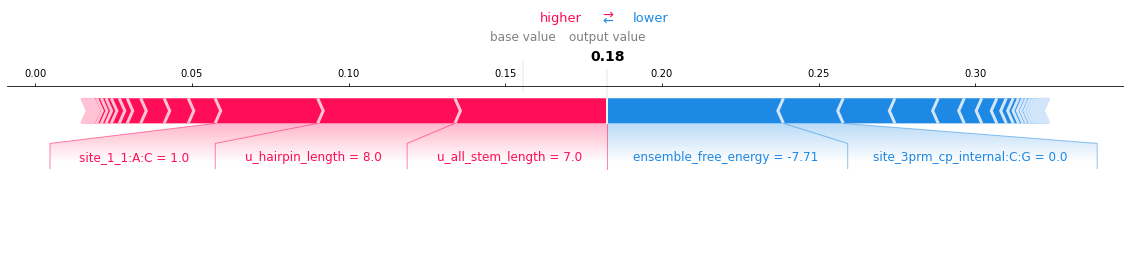

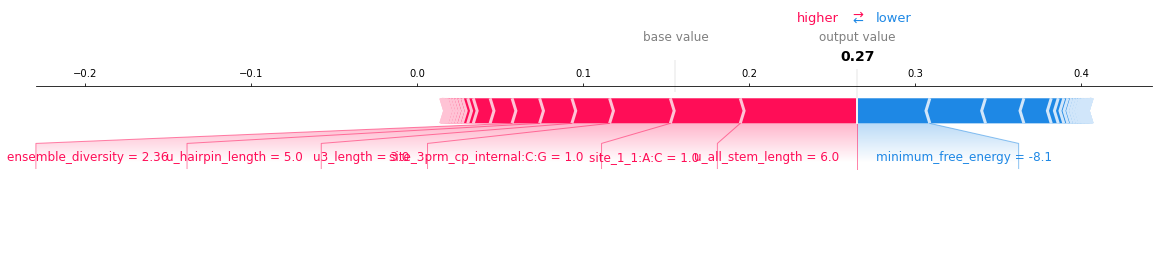

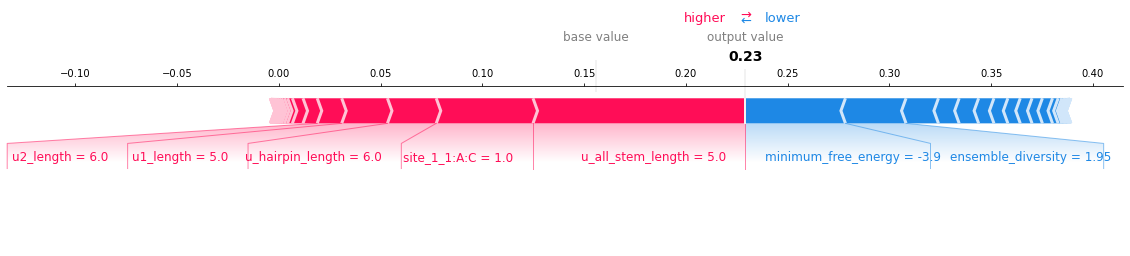

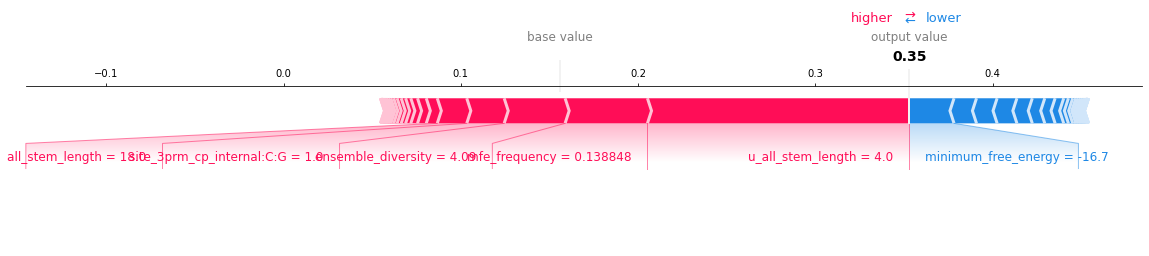

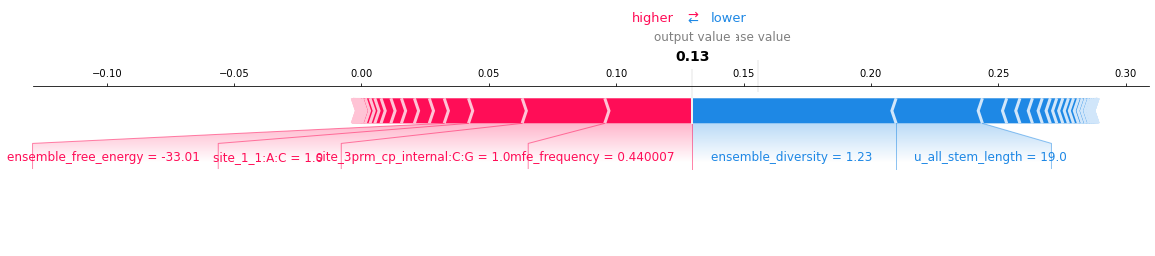

In [35]:
# visualize prediction for isoform with the highest editing level 
shap.initjs()
for i in range(8):
    shap.force_plot(explainer.expected_value, dbeal_shap_values[i,:], data_beal_to_predict.iloc[i],matplotlib=True,show=False)
    plt.savefig(test_df['Dataset'][i]+".pdf",format='pdf',height=1,width=7,bbox_inches="tight",dpi=300)